# Logistic Regression Proyect
## Table of contents
### Explore Data Analysis (EDA)

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
  * [3.1 Drop Duplicate Information](#c3-1)
  * [3.2 Drop Irrelevant Information](#c3-2)
* [4. Univariate Analysis](#c4)
  * [4.1 Dividing our dataset into categorical and numerical](#c4-1)
  * [4.2 Numerical Variable Analysis](#c4-2)

## 0. Problem Statement <a id='c0'></a>

The objective of this exercise is to conduct an in-depth EDA analysis and develop a predictive tree-decision model to determine if an indivdual based on health data will develop diabetes or not.

## 1. Importing libraries <a id='c1'></a>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import warnings
import pickle
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## 2. Data Collection <a id='c2'></a>

In [60]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=',')
    total_data.head()
    return total_data

get_data(URL)
total_data = get_data(URL)

## 3. Exploration and Data Cleaning <a id='c3'></a>

#### 3.1 Drop Duplicate Information <a id='c3-1'></a>

In this case, we don't delete any row beacause there is no duplicated data

In [61]:
total_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 3.2 Drop Irrelevant Information <a id='c3-2'></a>

Since al data is relevant, we don't delete any column

## 4. Univariate Analysis <a id='c4'></a>

### 4.1 Dividing our dataset into categorical and numerical <a id='c4-1'></a>

We don't have any categorical variables in this dataset, so we will only work with numerical variables.

In [62]:
numerical_variables = total_data.select_dtypes(include=['number']).columns.tolist()
numerical_variables.remove('Outcome')
print("Numerical Variables:", numerical_variables)

categorical_variables = total_data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_variables.append('Outcome')
print("Categorical Variables:", categorical_variables)

print(total_data.dtypes)

Numerical Variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical Variables: ['Outcome']
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### 4.2 Categorical Variable Analysis <a id='c4-2'></a>

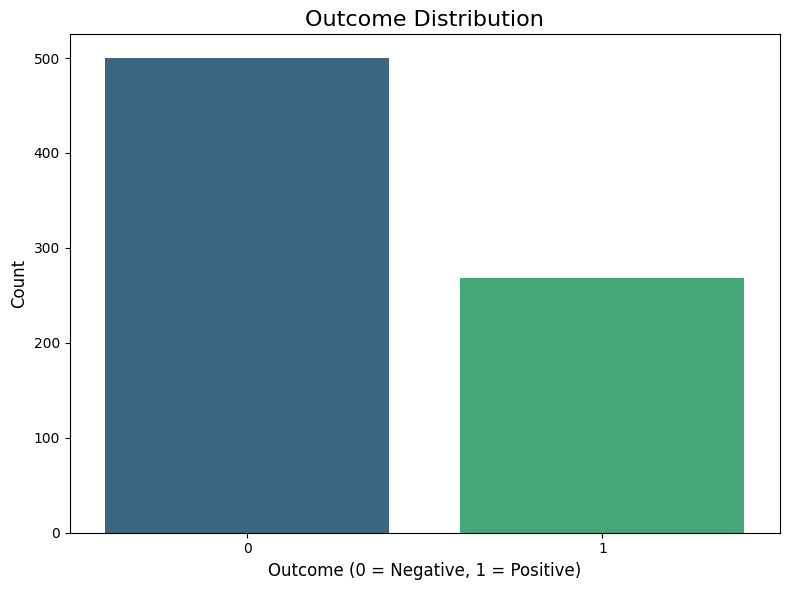

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(data=total_data, x="Outcome", palette='viridis')
plt.title("Outcome Distribution", fontsize=16)
plt.xlabel("Outcome (0 = Negative, 1 = Positive)", fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

### 4.3 Numerical Variable Analysis <a id='c4-3'></a>

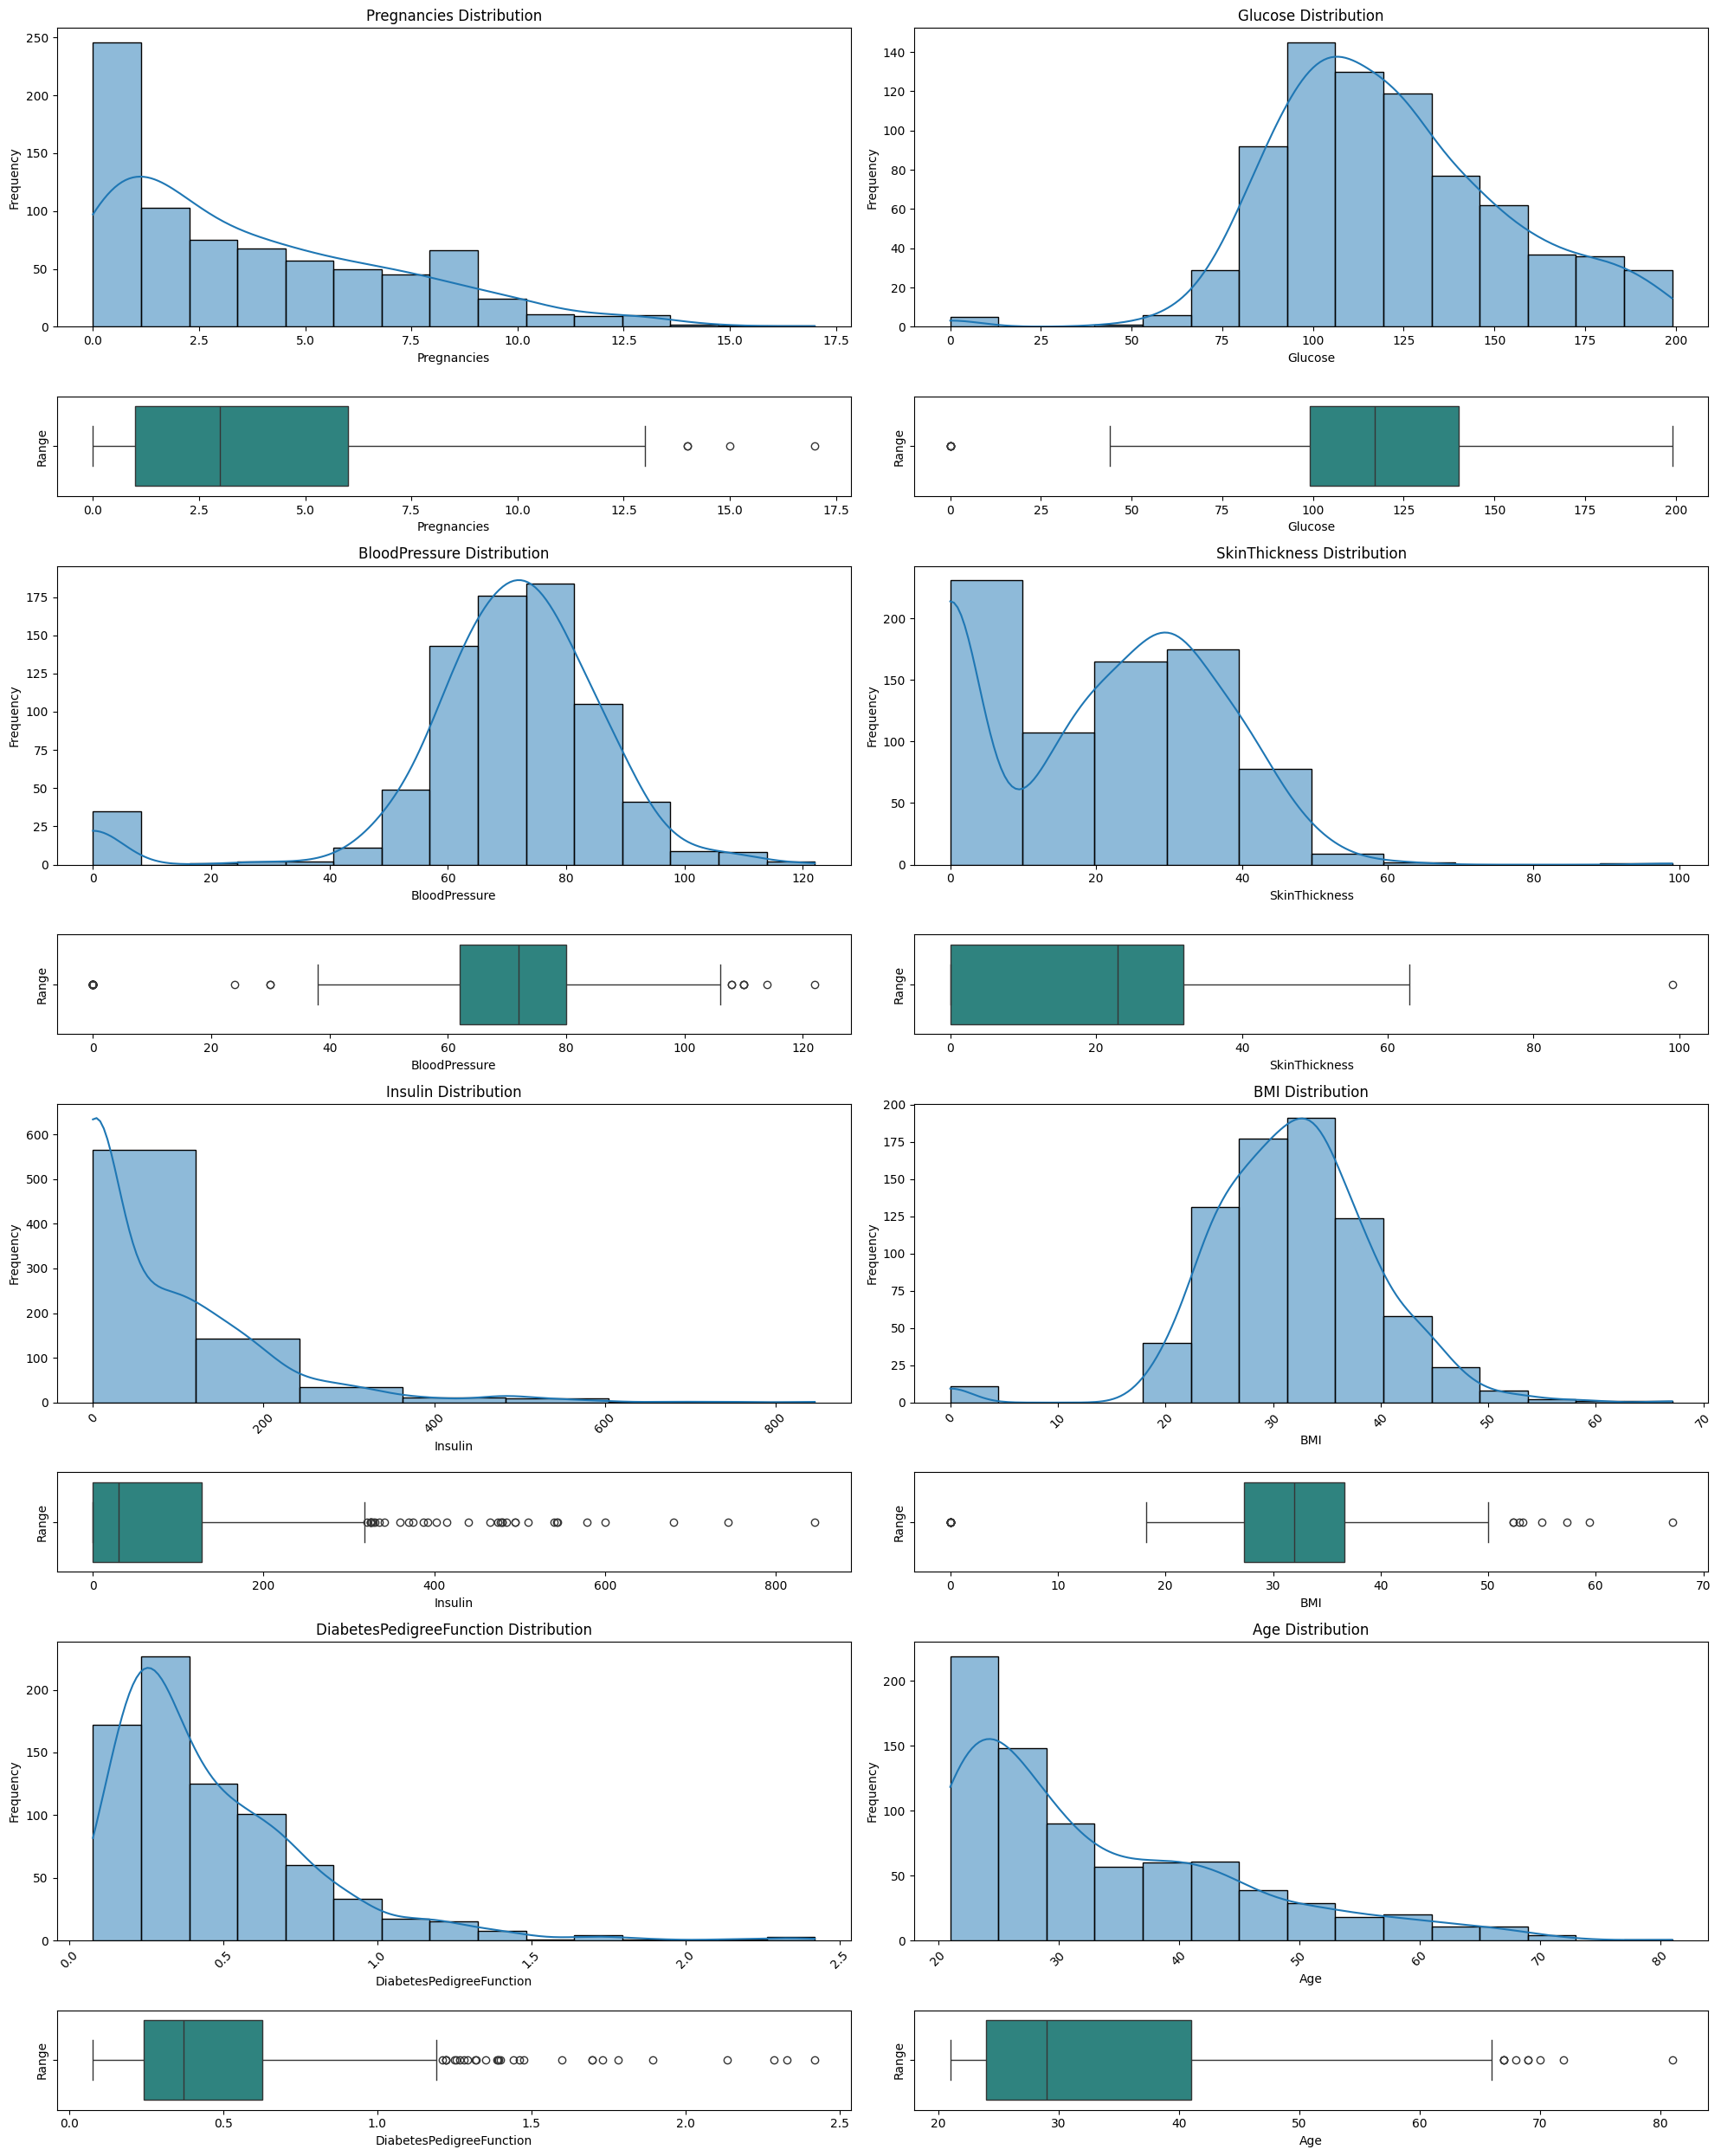

In [64]:
num_vars = len(numerical_variables)
nrows = num_vars // 2 + (num_vars % 2)
total_rows = nrows * 2
fig, axes = plt.subplots(
    nrows = total_rows,
    ncols=2,
    figsize=(20, 25),
    gridspec_kw={"height_ratios": [6, 2] * nrows}
)


# --- Row 0, Column 0: 'Pregnancies' ---
# Histplot
sns.histplot(
    data=total_data, x="Pregnancies", kde=True, bins=15, ax=axes[0, 0], palette="viridis"
)
axes[0, 0].set_title("Pregnancies Distribution", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="Pregnancies", ax=axes[1, 0], palette="viridis")
axes[1, 0].set_ylabel("Range", fontsize=10)
axes[1, 0].set_xlabel("Pregnancies", fontsize=10)
axes[1, 0].tick_params(axis="y", labelleft=False)


# --- Row 0, Column 1: 'Pregnancies' ---
# Histplot
sns.histplot(
    data=total_data, x="Glucose", kde=True, bins=15, ax=axes[0, 1], palette="viridis"
)
axes[0, 1].set_title("Glucose Distribution", fontsize=12)
axes[0, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="Glucose", ax=axes[1, 1], palette="viridis")
axes[1, 1].set_ylabel("Range", fontsize=10)
axes[1, 1].set_xlabel("Glucose", fontsize=10)
axes[1, 1].tick_params(axis="y", labelleft=False)


# --- Row 1, Column 0: 'BloodPressure' ---
# Histplot
sns.histplot(
    data=total_data, x="BloodPressure", kde=True, bins=15, ax=axes[2, 0], palette="viridis"
)
axes[2, 0].set_title("BloodPressure Distribution", fontsize=12)
axes[2, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="BloodPressure", ax=axes[3, 0], palette="viridis")
axes[3, 0].set_ylabel("Range", fontsize=10)
axes[3, 0].set_xlabel("BloodPressure", fontsize=10)
axes[3, 0].tick_params(axis="y", labelleft=False)


# --- Row 1, Column 1: 'SkinThickness' ---
# Histplot
sns.histplot(
    data=total_data, x="SkinThickness", kde=True, bins=10, ax=axes[2, 1], palette="viridis"
)
axes[2, 1].set_title("SkinThickness Distribution", fontsize=12)
axes[2, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="SkinThickness", ax=axes[3, 1], palette="viridis")
axes[3, 1].set_ylabel("Range", fontsize=10)
axes[3, 1].set_xlabel("SkinThickness", fontsize=10)
axes[3, 1].tick_params(axis="y", labelleft=False)


# --- Row 2, Column 0: 'Insulin' ---
# Histplot
sns.histplot(
    data=total_data, x="Insulin", kde=True, bins=7, ax=axes[4, 0], palette="viridis"
)
axes[4, 0].set_title("Insulin Distribution", fontsize=12)
axes[4, 0].set_ylabel("Frequency", fontsize=10)
axes[4, 0].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="Insulin", ax=axes[5, 0], palette="viridis")
axes[5, 0].set_ylabel("Range", fontsize=10)
axes[5, 0].set_xlabel("Insulin", fontsize=10)
axes[5, 0].tick_params(axis="y", labelleft=False)


# --- Row 2, Column 1: 'BMI' ---
# Histplot
sns.histplot(
    data=total_data, x="BMI", kde=True, bins=15, ax=axes[4, 1], palette="viridis"
)
axes[4, 1].set_title("BMI Distribution", fontsize=12)
axes[4, 1].set_ylabel("Frequency", fontsize=10)
axes[4, 1].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="BMI", ax=axes[5, 1], palette="viridis")
axes[5, 1].set_ylabel("Range", fontsize=10)
axes[5, 1].set_xlabel("BMI", fontsize=10)
axes[5, 1].tick_params(axis="y", labelleft=False)


# --- Row 3, Column 0: 'DiabetesPedigreeFunction' ---
# Histplot
sns.histplot(
    data=total_data, x="DiabetesPedigreeFunction", kde=True, bins=15, ax=axes[6, 0], palette="viridis"
)
axes[6, 0].set_title("DiabetesPedigreeFunction Distribution", fontsize=12)
axes[6, 0].set_ylabel("Frequency", fontsize=10)
axes[6, 0].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="DiabetesPedigreeFunction", ax=axes[7, 0], palette="viridis")
axes[7, 0].set_ylabel("Range", fontsize=10)
axes[7, 0].set_xlabel("DiabetesPedigreeFunction", fontsize=10)
axes[7, 0].tick_params(axis="y", labelleft=False)


# --- Row 3, Column 1: 'Age' ---
# Histplot
sns.histplot(
    data=total_data, x="Age", kde=True, bins=15, ax=axes[6, 1], palette="viridis"
)
axes[6, 1].set_title("Age Distribution", fontsize=12)
axes[6, 1].set_ylabel("Frequency", fontsize=10)
axes[6, 1].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="Age", ax=axes[7, 1], palette="viridis")
axes[7, 1].set_ylabel("Range", fontsize=10)
axes[7, 1].set_xlabel("Age", fontsize=10)
axes[7, 1].tick_params(axis="y", labelleft=False)

plt.tight_layout()
plt.show()